In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from store import *
import kbech32 

In [2]:
store = Store(os.getenv('localappdata') + r'\Kaspad\kaspa-mainnet\datadir2')
# store.load_blocks()

In [3]:
fields = ['amount', 'pubkey_script', 'blockDaaScore', 'isCoinbase']
frames = store.load_utxo_data(fields=fields)

0it [00:00, ?it/s]

In [4]:
df = pd.DataFrame(frames).set_index('pubkey_script')

In [5]:
utxo_sum = df['amount'].sum()

In [6]:
tips, hst = store.tips()

In [7]:
hst_header = store.get_header_data(hst)

In [8]:
(utxo_sum // 100_000_000) - (hst_header.daaScore * 500)

132602420

In [9]:
(utxo_sum // 100_000_000) / (hst_header.daaScore * 500)

1.0142652195873167

In [10]:
df_grouped = df.groupby('pubkey_script')

In [11]:
df_amounts = df_grouped['amount'].sum()

In [12]:
# kbech32.toAddress(df_amounts.sort_values(ascending=False).index[0])

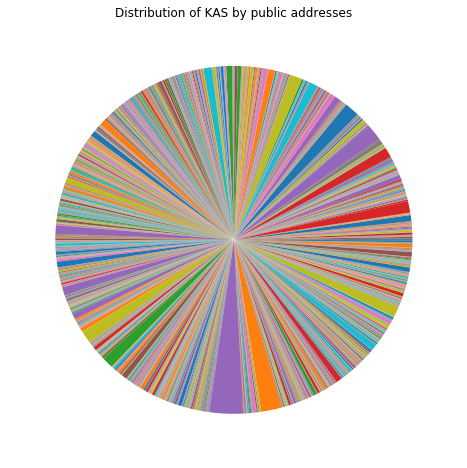

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(df_amounts)
plt.title('Distribution of KAS by public addresses')
plt.savefig(r'images\dist-all.png')
plt.show()

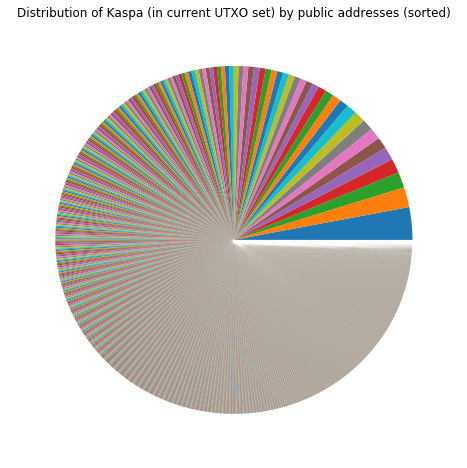

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(df_amounts.sort_values(ascending=False))
plt.title('Distribution of Kaspa (in current UTXO set) by public addresses (sorted)')
plt.savefig(r'images\dist_kas.png')
plt.show()

In [15]:
top_100_kas_holders = df_amounts.sort_values(ascending=False)[:100]
total_kas = sum(df_amounts)

print('Total number of addresses with positive balance: ', len(df_amounts))
print('Top 100 KAS holders hold\t{:.2f}% of the total supply {}'.format(
    (100*sum(top_100_kas_holders))/total_kas, total_kas//100_000_000))
print('Top 10 KAS holders hold\t\t{:.2f}% of the total supply {}'.format(
    (100*sum(top_100_kas_holders[:10]))/total_kas, total_kas//100_000_000))
print('Top KAS holder holds\t\t{:.2f}% of the total supply {}'.format(
    (100*top_100_kas_holders.iloc[0])/total_kas, total_kas//100_000_000))

Total number of addresses with positive balance:  41526
Top 100 KAS holders hold	41.19% of the total supply 9428107420
Top 10 KAS holders hold		14.02% of the total supply 9428107420
Top KAS holder holds		3.02% of the total supply 9428107420


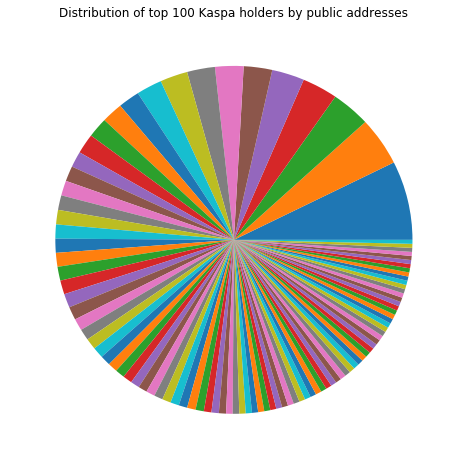

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(top_100_kas_holders)
plt.title('Distribution of top 100 Kaspa holders by public addresses')
plt.show()

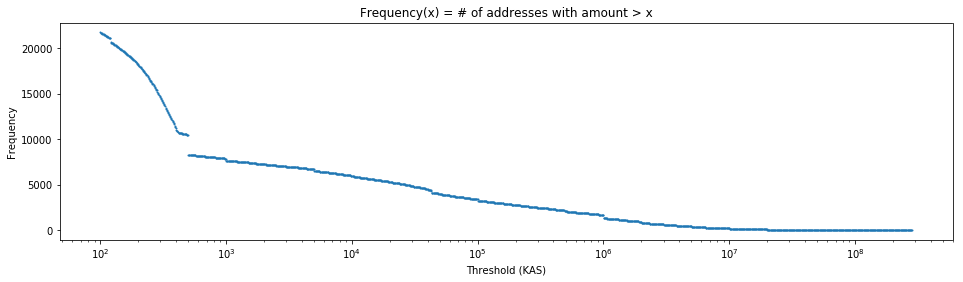

In [17]:
# The function f(x) = number of addresses which have at least x
X, Y = [], []
x = 100
while True:
    y = (df_amounts > x*100_000_000).values.sum()
    if y == 0:
        break
    X.append(x)
    Y.append(y)
    x *= 1.01
#     print(x, y)
#     break

plt.figure(figsize=(16, 4))
plt.scatter(X, Y, s=1)
plt.ylabel('Frequency')
plt.xlabel('Threshold (KAS)')
plt.xscale('log')
plt.title('Frequency(x) = # of addresses with amount > x')
plt.savefig(r'images\freq.png')
plt.show()

In [18]:
len(X)
# len(df_grouped)
# len(df_amounts)
# df_amounts.sort_values(ascending=False)[:100]

1494

In [19]:
# store.close()